In [113]:
# Dependencies
%pylab inline
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Data Description
+ H-1B Visa Petitions for 2011 - 2016

+ Source [Kaggle H-1B Visa Petitions 2011-2016](https://www.kaggle.com/nsharan/h-1b-visa)

### Context 
---
The H-1B is an employment-based, non-immigrant visa category for temporary foreign workers in the United States. For a foreign national to apply for H1-B visa, an US employer must offer a job and petition for H-1B visa with the US immigration department. This is the most common visa status applied for and held by international students once they complete college/ higher education (Masters, PhD) and work in a full-time position.

The Office of Foreign Labor Certification (OFLC) generates program data that is useful information about the immigration programs including the H1-B visa.

### Content
#### Number of Instances : 
#### Features:
1. CASE_STATUS: Status associated with the last significant event or decision. Valid values include “Certified,” “Certified-Withdrawn,” Denied,” and “Withdrawn”.  
** NOTE: Certified does not mean the employee was granted an H-1B Visa rather. Certified is a status that allows the application to apply for an H-1B Visa **
2. EMPLOYER_NAME: Name of employer submitting labor condition application
3. SOC_NAME: Standard Occupation Code according to SOC Classification system. 
4. JOB TITLE: Title of the employee position
5. FULL_TIME_POSITION: Y = Full Time Position, N = Part Time Position
6. PREVAILING_WAGE: Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position. 
7. YEAR: Year in which the H-1B visa petition was filed
8. WORKSITE: City and State Information of the foreign worker's intended area of employment
9. Lon : Longitude of worksite
10. Lon : latitude of worksite

# Read Data
___

In [114]:
filePath = "./Data/h1b_kaggle.csv"
df = pd.read_csv(filePath, header=0)

### General Data Cleaning
___

In [115]:
df[:3]

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158


+ ** Remove the features that we do not need for any analysis we intend to perform **

In [116]:
# remove the first index column
del df["Unnamed: 0"]

In [117]:
df[:3]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158


In [118]:
# Remove "Lon" and "Lat"
del df["lon"]
del df["lat"]

In [119]:
df[:3]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"


In [120]:
worksite = df["WORKSITE"]
worksite[:3]

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
Name: WORKSITE, dtype: object

In [121]:
df[["CITY", "STATE"]] = df["WORKSITE"].str.split(', ', expand=True)
df[:3]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",PLANO,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",JERSEY CITY,NEW JERSEY


In [122]:
## Now delete the worksite feature
del df["WORKSITE"]

In [123]:
df[:3]

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,PLANO,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,JERSEY CITY,NEW JERSEY


## Feature-specific Data Cleaning

#### CASE_STATUS
___

In [124]:
case_status_series = df["CASE_STATUS"]

In [125]:
## Analyze the values in Case status
print(case_status_series.value_counts())

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


In [129]:
## We are only intrested in these outcomes 
# certified | certified-withdraw | denied | Withdrawn 
# The others are outliers. Lets remove them 
df.drop(df[df.CASE_STATUS == "REJECTED"].index, axis=0, inplace=True)
df.drop(df[df.CASE_STATUS == "PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED"].index, axis=0, inplace=True)
df.drop(df[df.CASE_STATUS == "INVALIDATED"].index, axis=0, inplace=True)

In [131]:
## Analyze the values in Case status
print(df["CASE_STATUS"].value_counts())

CERTIFIED              2615623
CERTIFIED-WITHDRAWN     202659
DENIED                   94346
WITHDRAWN                89799
Name: CASE_STATUS, dtype: int64


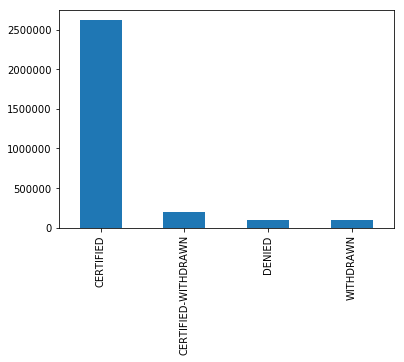

In [136]:
# Check out the distribution of likely outcomes
df["CASE_STATUS"].value_counts().plot.bar()

#### EMPLOYER_NAME
___

In [139]:
# Are there any missing employer names 
print("There %d instances missing employer names" % len(df[pd.isnull(df.EMPLOYER_NAME)]))

There 59 instances missing employer names


+ Since these are not numerical data we cannot imput using a measure of central tendency
+ Since the data seems to be missing completely at random, we should remove it. Cannot figure out what employer name should be from the available data

In [140]:
# Remove Instances without Employer name valued
df = df[pd.notnull(df["EMPLOYER_NAME"])]

#### SOC_NAME
___

+ The SOC_NAME captures the same information as Job title. In the essence of dimension reduction and to only use features that are neccessary. i will remove this feature 

In [142]:
del df["SOC_NAME"]

In [143]:
df[:3]

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674.0,2016.0,PLANO,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,Y,193066.0,2016.0,JERSEY CITY,NEW JERSEY


#### JOB TITLE
___

In [144]:
# Do we have any missing values
print("There %d missing instances of job title" % len(df[pd.isnull(df["JOB_TITLE"])]))

There 21 missing instances of job title


In [145]:
# Remove these missing instances
df = df[pd.notnull(df["JOB_TITLE"])]

In [149]:
# How many distinct Job titles are there 
job_stat = df["JOB_TITLE"].value_counts()
print("There %d distinct jobs in the DataSet" %job_stat[0])

There 249034 distinct jobs in the DataSet


#### FULL_TIME_POSITION
___

In [151]:
# Do we have missing values
print("There %d missing instance of full time" % len(df[pd.isnull(df["FULL_TIME_POSITION"])]))

There 1 missing instance of full time


In [152]:
df[pd.isnull(df["FULL_TIME_POSITION"])]

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
131977,DENIED,FOUR SEASONS HEATING AND AIR CONDITIONING,COMPUTER SYSTEMS ANALAYST,NaN,NaN,2016.0,CHICAGO,ILLINOIS


In [153]:
# Remove this instance
df = df[pd.notnull(df["FULL_TIME_POSITION"])]

#### PREVAILING WAGE
___

In [165]:
# Do we have any missing values
print("There %d instances missing prevailing values" % len(df[pd.isnull(df["PREVAILING_WAGE"])]))

There 0 instances missing prevailing values


In [160]:
# Applications have to have a wage provided. 
# Remove instances with wages missing
df = df[pd.notnull(df["PREVAILING_WAGE"])]
df[:2]

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674.0,2016.0,PLANO,TEXAS


In [162]:
# We can see that the wage values are in floats. For easier calculations convert these to ints 
df["PREVAILING_WAGE"] = df["PREVAILING_WAGE"].astype(int)
df[:2]

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016.0,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674,2016.0,PLANO,TEXAS


#### YEAR
___

In [166]:
# Do we have any missing Data
print("There %d instances missing Year values" % len(df[pd.isnull(df["YEAR"])]))

There 0 instances missing Year values


In [168]:
## That is great, Now, need to convert the year as given to ints 
df["YEAR"] = df["YEAR"].astype(int)
df[:2]

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,CITY,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,ANN ARBOR,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,Y,242674,2016,PLANO,TEXAS


# Data Exploration
---

#### CASE_STATUS
___

In [190]:
df_group = df.groupby("CASE_STATUS")
total = len(df)
print("TOTAL Number of Instances : %d " %total)
print("CERTIFIED : {:04.2f} % ".format(df_group.size()[0]* 100 / total))
print("CERTIFIED-WITHDRAWN: {:04.2f} % ".format(df_group.size()[1]* 100/total))
print("DENIED: {:04.2f} % ".format(df_group.size()[2]* 100/total))
print("WITHDRAWN: {:04.2f} % ".format(df_group.size()[3]* 100/total))


TOTAL Number of Instances : 3002293 
CERTIFIED : 87.12 % 
CERTIFIED-WITHDRAWN: 6.75 % 
DENIED: 3.14 % 
WITHDRAWN: 2.99 % 


#### PREVAILING_WAGE

In [171]:
f = {"PREVAILING_WAGE" : ["count", "mean"]}
df.groupby("JOB_TITLE").agg(f)

PREVAILING_WAGE  \
                                                             count   
JOB_TITLE                                                            
"BUSINESS SYSTEM ANALYST                                         1   
"SALES MANAGER                                                   1   
"TEST" SENIOR SCIENTIST                                          1   
"TRAIN THE TRAINER" PROGRAM SUPERVISOR                           1   
'ACCOUNTANT                                                      1   
'COMPUTER SYSTEMS ANALYSTS                                       1   
'DIRECTOR OF USER ACQUISITION                                    1   
'OF COUNSEL' TRANSACTION ATTORNEY                                1   
( CONSULTANT) ETL DEVELOPER                                      1   
(2ND YEAR) ANALYST                                               1   
(ASSOCIATE) BRAND MANAGER                                        1   
(ASSOCIATE) FINANCIAL ANALYST                                    1   
(BCF) ASSOCIATE DIRECTOR, SAF EXECUTION (NEW YORK)               1   
(BILINGUAL) PROGRAMMER                                           1   
(BIOINFORMATICS) SYSTEMS ANALYST 2                               1   
(BIOLOGICAL) SR RESEARCH ASSOCIATE                               2   
(BIOLOGICAL) SYSTEMS ANALYST  2                                  2   
(BIOLOGIST) SENIOR RESEARCH ASSOCIATE                            1   
(BRIDGES) CIVIL ENGINEER                                         1   
(BRIDGES) SENIOR CIVIL ENGINEER                                  1   
(BUSINESS) SYSTEMS ANALYST                                       9   
(CARDIAC) HOSPITALIST                                            1   
(CHEMICAL-MECHANICAL ENGINEERING) PROJECT SCIENTIS               1   
(CLINCAL) SYSTEMS ANLYST                                         2   
(COMPUTER SYSTEMS ENGINEER/ARCHITECT                             2   
(COMPUTER SYSTEMS) RESEARCH ANALYST                              1   
(COMPUTER) PRODUCT ENGINEER                                      1   
(EDUCATION) ADMINISTRATOR                                        1   
(ENTERPRISE) APPLICATIONS DEVELOPER                              2   
(EQUITY) SALES ASSISTANT                                         1   
...                                                            ...   
ZYQAD SPECIALIST                                                 2   
[FINANCIAL] ANALYST, STRUCTURED CREDIT                           3   
[HIOX] COMMERCIAL SPECIALIST (SALES ENGINEER)                    1   
[PHYSICAL THERAPIST                                              1   
]ENGINEERING LEAD                                                3   
`QUALITY ASSURANCE ANALYST                                       1   
|NFORMATION MANAGEMENT SPECIALIST                                1   
  MIDDLEWARE ADMINISTRATION.                                     2   
 BUSINESS ANALYST                                                1   
 BUSINESS INTELLIGENCE ANALYST                                   2   
 COMPUTER SYSTEMS ENGINEER                                       1   
 CONSULTANT - US                                                 1   
 LEAD CONSULTANT - US                                            1   
 LEAD TEST ANALYST                                               1   
 MOBILE SQA ENGINEER                                             2   
 ORACLE APPS DBA                                                 1   
 PROJECT MANAGERS                                                1   
 QA ANALYST                                                      1   
 QUALITY ASSURANCE ANALYST                                       1   
 SAS ANALYST                                                     1   
 SENIOR PROJECT LEADER                                           1   
 SHAREPOINT/SQL DEVELOPER                                        1   
 SOFTWARE ENGINEER                                              25   
 SOFTWARE PROGRAMMER                                         